In [1]:
import pandas as pd

In [2]:
# pandas의 read_csv 함수를 이용해 데이터 불러오기
titanic_df = pd.read_csv('titanic.csv')

In [3]:
# 만들어진 DataFrame 확인
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# PassengerID를 index로 사용
titanic_df.set_index('PassengerId', inplace=True)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 데이터셋에 대한 세부정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# 생존 데이터 분석에 필요한 데이터만 남기고 불필요한 데이터 삭제
titanic_df.drop(columns=['Name','Cabin','Embarked','Ticket'],inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [7]:
# 중복 데이터 확인
titanic_df[titanic_df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
43,0,3,male,NaN,0,0,7.8958
48,1,3,female,NaN,0,0,7.7500
77,0,3,male,NaN,0,0,7.8958
78,0,3,male,NaN,0,0,8.0500
88,0,3,male,NaN,0,0,8.0500
...,...,...,...,...,...,...,...
878,0,3,male,19.0,0,0,7.8958
879,0,3,male,NaN,0,0,7.8958
882,0,3,male,33.0,0,0,7.8958


In [8]:
# 중복 데이터 삭제
titanic_df.drop_duplicates(inplace = True)
titanic_df[titanic_df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,


In [9]:
# 누락된 값이나 null값 확인
# Age Column에 103개 확인
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         103
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
# fillna() 함수를 이용해 Null값을 채움
# 데이터 손실을 방지하기 위해 Age의 평균값으로 채움
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [11]:
# Sex Column 데이터 변환
# male : 0, femaile : 1
titanic_df.replace({'Sex': {'male': 0}}, inplace = True)
titanic_df.replace({'Sex' : {'female': 1}}, inplace = True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,0,22.000000,1,0,7.2500
2,1,1,1,38.000000,1,0,71.2833
3,1,3,1,26.000000,0,0,7.9250
4,1,1,1,35.000000,1,0,53.1000
5,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,3,1,39.000000,0,5,29.1250
888,1,1,1,19.000000,0,0,30.0000
889,0,3,1,29.819614,1,2,23.4500


<AxesSubplot:>

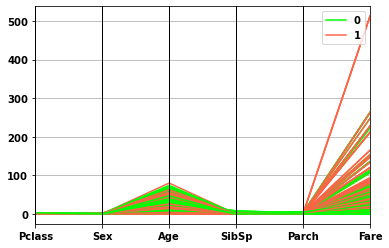

In [12]:
# 데이터 정규화
# 다른 column들에 비해 Age와 Fare에 정규화가 필요해 보임
# Fare에 이상치 값도 예상할 수 있음
pd.plotting.parallel_coordinates(titanic_df, 'Survived',
                                 color=['lime', 'tomato', 'dodgerblue'])

<AxesSubplot:>

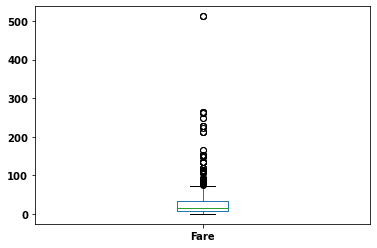

In [13]:
# Fare column의 이상값을 Boxplot을 통해 도출
titanic_df['Fare'].plot(kind="box")

<AxesSubplot:>

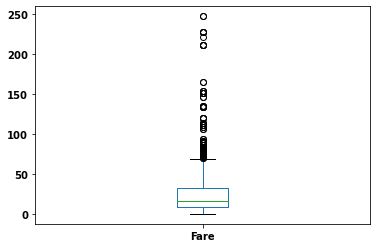

In [14]:
# 250 이상의 값을 삭제
titanic_df.drop(titanic_df[titanic_df.Fare >= 250].index, inplace = True)
titanic_df['Fare'].plot(kind="box")

In [15]:
# Age와 Fare의 값에 정규화가 필요해 보임
# 다른 colunm들에 비해 값이 크기 때문에 데이터가 편향되어 모델 훈련에 적합하지 않다.
titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.408854,2.257812,0.372396,29.810990,0.515625,0.404948,31.288313
std,0.491943,0.849076,0.483758,13.733002,0.979458,0.824227,38.216073
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,0.000000,29.819614,0.000000,0.000000,15.850000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,32.625000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,247.520800


In [16]:
# Min-max 정규화 사용
# sklearn의 MinMaxScaler() 함수 사용
# 0과 1 사이의 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
titanic_df[['Fare']] = scaler.fit_transform(titanic_df[['Fare']])
titanic_df[['Age']] = scaler.fit_transform(titanic_df[['Age']])
titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.408854,2.257812,0.372396,0.369326,0.515625,0.404948,0.126407
std,0.491943,0.849076,0.483758,0.172569,0.979458,0.824227,0.154395
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.268032,0.000000,0.000000,0.032523
50%,0.000000,3.000000,0.000000,0.369435,0.000000,0.000000,0.064035
75%,1.000000,3.000000,1.000000,0.447097,1.000000,1.000000,0.131807
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


<AxesSubplot:>

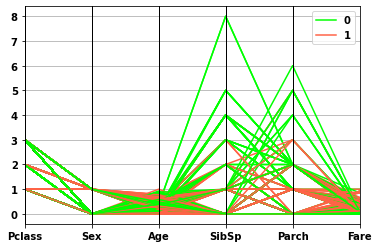

In [17]:
# 값이 대체로 작은 범위 내에서 균일해 진 것을 볼 수 있다.
pd.plotting.parallel_coordinates(titanic_df, 'Survived',
                                 color=['lime', 'tomato', 'dodgerblue'])

In [18]:
# Correlation
# 상관관계 분석 table
# 어떤 데이터가 생존에 얼마나 영향을 미치는지 유추할 수 있다.
# 1에 가까울수록 정비례적 방향을 보이고 -1에 가까울수록 반비례적 방향을 보임
corr = titanic_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.330718,0.509872,-0.075605,-0.045746,0.067031,0.259545
Pclass,-0.330718,1.000000,-0.113427,-0.343850,0.109594,0.068596,-0.628246
Sex,0.509872,-0.113427,1.000000,-0.087796,0.089514,0.239305,0.210784
Age,-0.075605,-0.343850,-0.087796,1.000000,-0.278854,-0.199438,0.110947
SibSp,-0.045746,0.109594,0.089514,-0.278854,1.000000,0.366024,0.125593
Parch,0.067031,0.068596,0.239305,-0.199438,0.366024,1.000000,0.163676
Fare,0.259545,-0.628246,0.210784,0.110947,0.125593,0.163676,1.000000
